In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [248]:
df = pd.read_csv(r'data_loan.csv')

In [249]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [250]:
df.shape

(614, 13)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [252]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [253]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [254]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing')

,column_name,percent_missing
Loan_ID,Loan_ID,0.000000
Education,Education,0.000000
ApplicantIncome,ApplicantIncome,0.000000
CoapplicantIncome,CoapplicantIncome,0.000000
Property_Area,Property_Area,0.000000
Loan_Status,Loan_Status,0.000000
Married,Married,0.488599
Gender,Gender,2.117264
Loan_Amount_Term,Loan_Amount_Term,2.280130
Dependents,Dependents,2.442997


In [255]:
print('We will first find appropriate values to impute for the missing values of Credit History and drop the rest as the are missing \nless than 5%. Although Self_Employed is missing more than 5% we still drop all na values as they are harder to predict.')

We will first find appropriate values to impute for the missing values of Credit History and drop the rest as the are missing 
less than 5%. Although Self_Employed is missing more than 5% we still drop all na values as they are harder to predict.


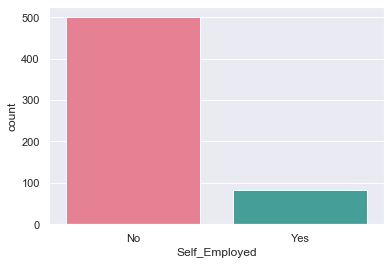

In [256]:
sns.set_style('whitegrid')
sns.set(font_scale = 1)
sns.countplot(x='Self_Employed',data=df, palette='husl')
plt.show()

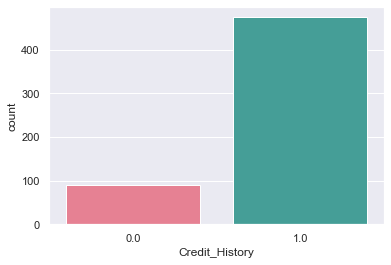

In [257]:
sns.set_style('whitegrid')
sns.set(font_scale = 1)
sns.countplot(x='Credit_History',data=df, palette='husl')
plt.show()

In [258]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [259]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [260]:
df.dropna(inplace=True) 

In [261]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [262]:
df.shape

(553, 13)

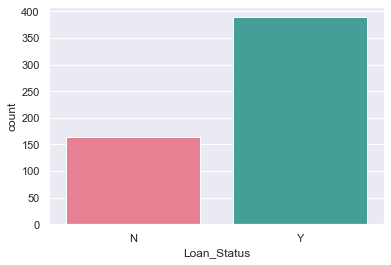

In [263]:
sns.set_style('whitegrid')
sns.set(font_scale = 1)
sns.countplot(x='Loan_Status',data=df, palette='husl')
plt.show()

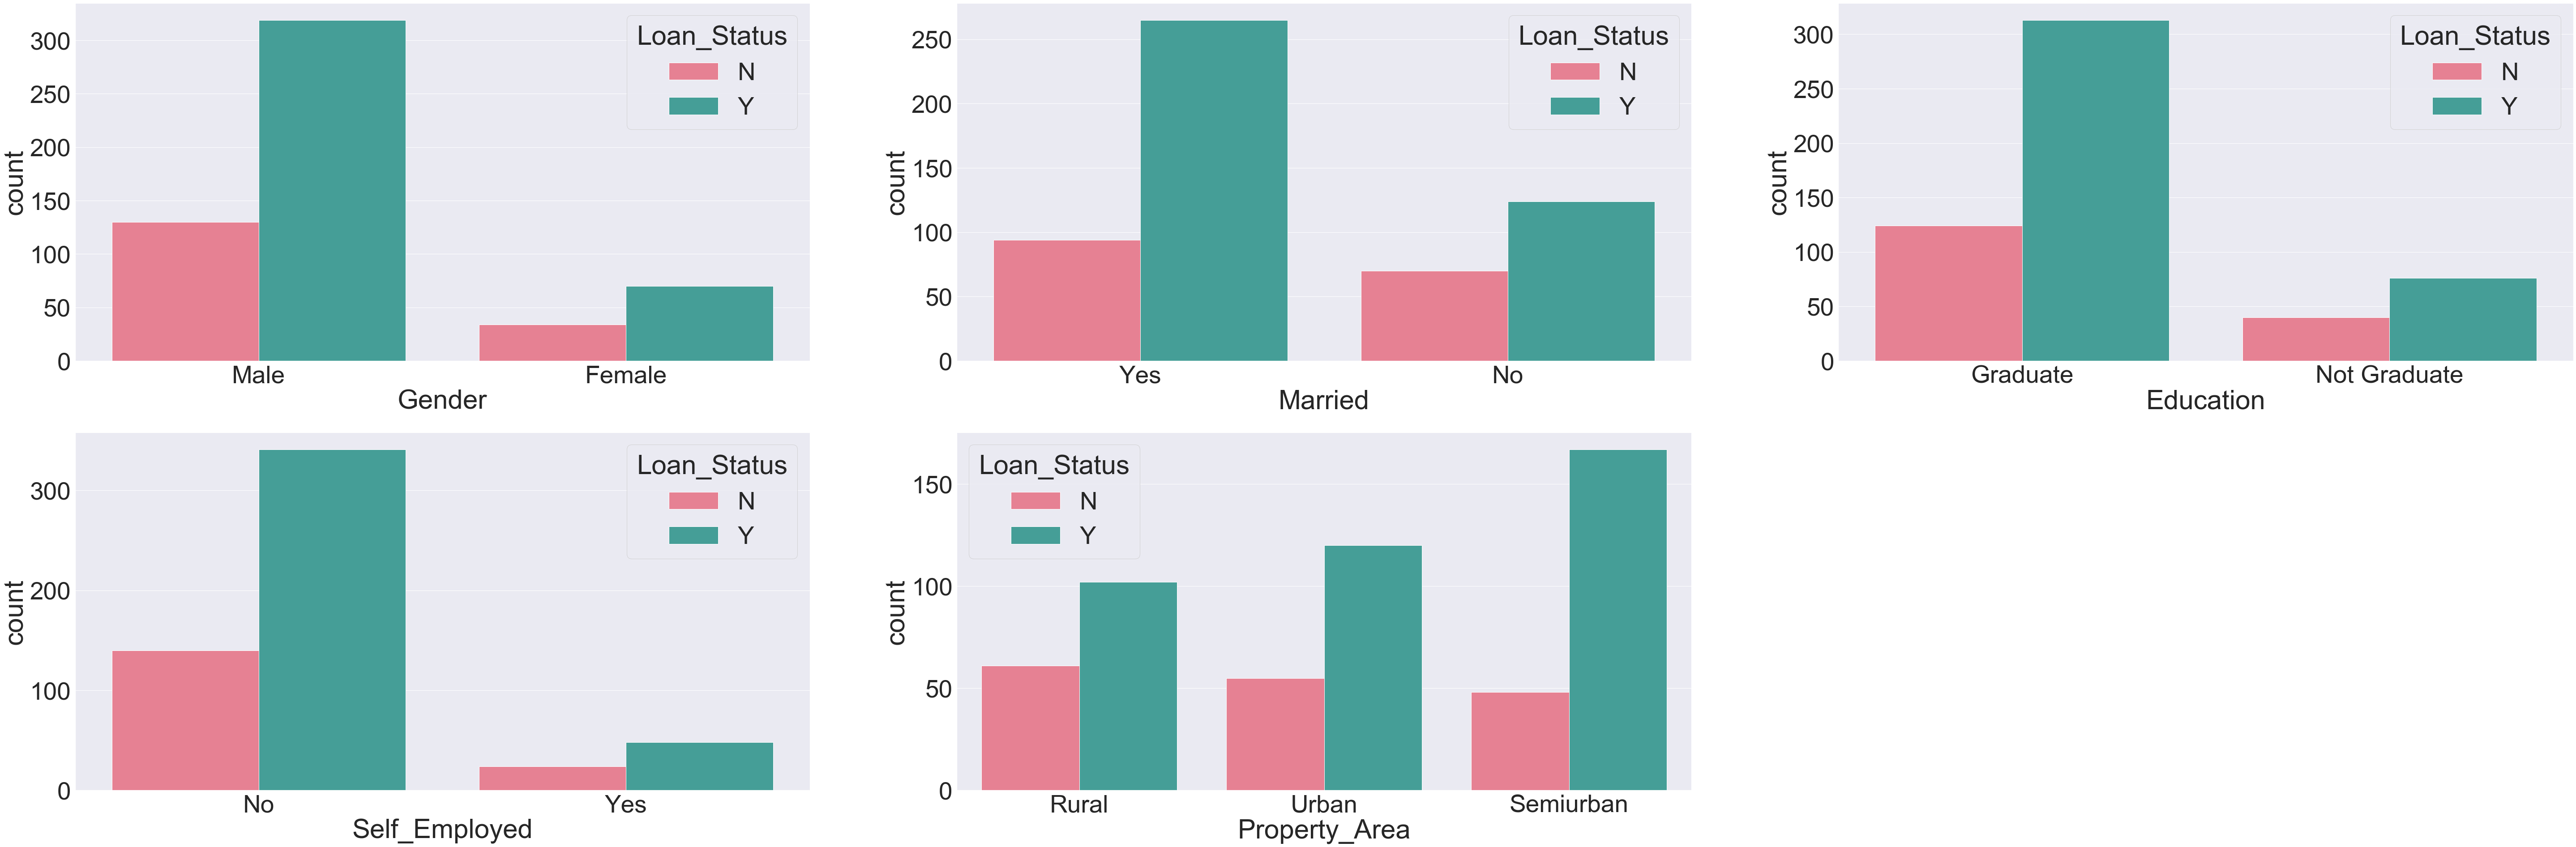

In [264]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'], palette='husl')
plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'], palette='husl')
plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'], palette='husl')
plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'], palette='husl')
plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'], palette='husl')

In [265]:
## convert to numeric

In [266]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [267]:
df['Dependents'].replace('3+',3, inplace=True)

In [268]:
Gender = pd.get_dummies(df['Gender'], prefix='Gender', prefix_sep='_',drop_first=True)
Married = pd.get_dummies(df['Married'], prefix='Married', prefix_sep='_',drop_first=True)
Education = pd.get_dummies(df['Education'], prefix='Education', prefix_sep='_',drop_first=True)
Self_Employed = pd.get_dummies(df['Self_Employed'], prefix='Self_Employed', prefix_sep='_',drop_first=True)
Property_Area = pd.get_dummies(df['Property_Area'], prefix='Property_Area', prefix_sep='_',drop_first=True)


In [269]:
df.drop(['Gender','Married','Education','Self_Employed','Property_Area', 'Loan_ID'],axis=1,inplace=True)
df = pd.concat([Gender,Married,Education,Self_Employed,Property_Area, df],axis=1)

In [270]:
df.head()

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,1,1,0,0,0,0,1,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,0,1,0,3000,0.0,66.0,360.0,1.0,1
3,1,1,1,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,0,1,0,1,2,5417,4196.0,267.0,360.0,1.0,1


In [271]:
x = df.iloc[1:,:-1].values
y = df.iloc[1:,-1].values

In [272]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

In [273]:
from sklearn import metrics

In [274]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

ypred = model.predict(xtest)
print('Logistic Regression accuracy = ', metrics.accuracy_score(ypred,ytest))

Logistic Regression accuracy =  0.8405797101449275


In [275]:
from sklearn.metrics import confusion_matrix

In [276]:
print(confusion_matrix(ytest,ypred))

[[ 14  22]
 [  0 102]]


In [277]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytest,ypred)
accuracy

0.8405797101449275

In [278]:
from sklearn.metrics import classification_report

In [279]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56        36
           1       0.82      1.00      0.90       102

    accuracy                           0.84       138
   macro avg       0.91      0.69      0.73       138
weighted avg       0.87      0.84      0.81       138

